In [ ]:
# (그래프에 한글이 깨질경우) 아래 코드 실행 > '런타임: 세션 다시시작' 실행
!pip install matplotlib -U
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

## **라이브러리 다운로드 및 불러오기**

In [ ]:
# 라이브러리 불러오기: 데이터 핸들링
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from tqdm import tqdm, trange

# 라이브러리 불러오기: 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # plot "-" 부호 표기 설정
import plotly.express as px

# 라이브러리 불러오기: 수리통계
from scipy import stats as sp # 과학 계산용 파이썬 모듈
from scipy import stats
from scipy.stats import *
import scipy.stats
import scipy
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_rel

In [ ]:
#구글드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---

In [ ]:
## T-검정(T-Test)
# ①2개 집단의 평균값 차이가 통계적으로 같은 집단인지, 다른 집단인지 비교하는 검정 방법
# ②"두 모집단의 평균간 차이는 없다"라는 귀무가설과 "두 모집단의 평균간 차이가 있다"라는 대립가설 중에 하나를 선택할 수 있도록 하는 통계적 검정방법
# ③모집단의 분산이나 표준편차를 알수 없을 때 모집단을 대표하는 표본으로부터 추정된 분산이나 표준편차를 가지고 검증하는 방법

#T-검정의 조건
#독립성: 독립변수의 그룹 군은 서로 독립적이어야 함
#         - 대응표본일 경우, 대응표본 T-검정 실행
#정규성: 독립변수에 따른 종속변수는 정규분포를 만족함
#         - 정규분포가 아닐 경우, Mann-Whitney test 실행
#등분산성: 독립변수에 따른 종속변수의 분포의 분산은 유사한 값을 가짐
#         - 분산이 서로 다를 경우, 자유도를 수정한 독립표본 T-검정 실행

## 종류
# ①일표본 T-검정(One sample t-test): 표본의 평균과 특정 기준값의 차이 분석
#  ㄴ예시) B대학의 남학생 평균 키가 180cm와 같은지 다른지 비교

# ②독립표본 T-검정(One sample t-test/Independent sample t-test): 독립된 두 표본(집단)의 평균 차이 분석
# 귀무가설: "A와 B의 평균은 통계적으로 유의한 차이가 없다(즉, 고객 집단의 B등급과 C등급의 매출액은 같다)
# 수행조건: 독립성/정규성/등분산성
#   ㄴ예시) 고객 등급별 평균 매출액 차이 비교

# ③대응표본 T-검정(Paired sample t-test): 동일한 표본(집단)의 어떠한 변수에 따른 전/후에 변화 분석
# 귀무가설: "변수에 따른 사전과 사후는 통계적으로 유의한 차이가 없다(즉, 코로나19 팬데믹 후에도 발생 전과 동일하게 매출액 변화가 없다)
#  ㄴ예시) 코로나19 팬데믹 전/후 전자상거래 상점의 평균 매출액 차이


## 독립표본 T-검정과 대응표본 T-검정의 차이점 비교
# 독립표본 검정은 다른 2개 집단의 평균 차이를 검정하는 방법이지만 대응표본 검정은 서로 대응되는 2개 집단의 차이 평균을 검정
# 예시) 독립표본 T-검정: 광고를 시청한 A집단과 광고를 시청하지 않은 B집단의 차이를 확인하고 싶을 때 사용(독립적 집단)
#       대응표본 T-검정: C집단에서 광고를 보기 전과 보고난 후 차이를 검정하고 싶을 때 사용(페어되는 집단)

---

## **데이터**
  - 데이터명: 중등학교 수학 수업에 대한 설명조사 데이터(UCI 캘리포니아 어바인 대학)
  - 출처: 캐글의 오픈 데이터(https://www.kaggle.com/datasets/uciml/student-alcohol-consumption)

In [ ]:
# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/4. Project/3. 홍생정 블로그/student-mat.csv')
df = df[['sex', 'G1', 'G2', 'G3']]

print(df.shape)
df.head()

(395, 4)


,sex,G1,G2,G3
0,F,5,6,6
1,F,5,5,6
2,F,7,8,10
3,F,15,14,15
4,F,6,10,10


___

In [ ]:
# 본 T-검정을 수행하기 전 정규성 여부를 확인해야하지만, 중심극한정리를 근거로 해당 단계는 생략하고 진행했음

# 여기서, 중심극한정리란,모집단의 분포가 어떤 형태를 가지고 있는지 모르더라도, 표본을 충분히 추출한다면 표본 평균들의 분포가 정규분포를 이룬다는 추정 원리를 의미

___

## **일표본 T-검정(One sample t-test)**

In [ ]:
# 참고) 정규분포 특징 중 하나로 '평균 = 중앙값 = 최빈값'이 모두 같음
df.describe(include='all')

,sex,G1,G2,G3
count,395,395.000000,395.000000,395.000000
unique,2,NaN,NaN,NaN
top,F,NaN,NaN,NaN
freq,208,NaN,NaN,NaN
mean,NaN,10.908861,10.713924,10.415190
std,NaN,3.319195,3.761505,4.581443
min,NaN,3.000000,0.000000,0.000000
25%,NaN,8.000000,9.000000,8.000000
50%,NaN,11.000000,11.000000,11.000000
75%,NaN,13.000000,13.000000,14.000000


In [ ]:
# 목적: G시험의 점수가 알려진 평균 점수와 통계적으로 유의미한 차이가 있는지 확인

# 귀무가설: G시험의 점수가 평균 점수와 차이가 없다(즉, 서로 유사하다)
# 대립가설: G시험의 점수가 평균 점수와 차이가 있다(즉, 서로 다르다)

# 신뢰도 95% 수준, 유의수준 0.05일 경우
# 알려진 평균
avg_g = 11

print('1. G1의 일표본 T-검정:', stats.ttest_1samp(df['G1'], avg_g))
print('2. G2의 일표본 T-검정:', stats.ttest_1samp(df['G2'], avg_g))
print('3. G3의 일표본 T-검정:', stats.ttest_1samp(df['G3'], avg_g))

1. G1의 일표본 T-검정: TtestResult(statistic=-0.5457217062574703, pvalue=0.5855660788228925, df=394)
2. G2의 일표본 T-검정: TtestResult(statistic=-1.5115352913033382, pvalue=0.13145373816778866, df=394)
3. G3의 일표본 T-검정: TtestResult(statistic=-2.53694575535098, pvalue=0.011567344595276299, df=394)


In [ ]:
# 상기 모든 p-value가 0.05보다 큰 값이 산출되어 귀무가설을 기각할 수 없습니다. 따라서, G점수의 평균은 11점이라 가정해도 지장이 없습니다.

___

## **독립표본 T-검정(One sample t-test/Independent sample t-test)**


In [ ]:
# 남자/여자 데이터 구분
male_df = df[df['sex'] == 'M']
female_df = df[df['sex'] == 'F']

In [ ]:
# 남자/여자 데이터 기초통계값 확인
print("<남자 학생의 시험설정 기초통계값>")
print(male_df.describe()); print(); print()

print("<여자 학생의 시험설정 기초통계값>")
print(female_df.describe())

<남자 학생의 시험설정 기초통계값>
               G1          G2          G3
count  187.000000  187.000000  187.000000
mean    11.229947   11.074866   10.914439
std      3.392839    3.868088    4.495297
min      3.000000    0.000000    0.000000
25%      9.000000    9.000000    9.000000
50%     11.000000   11.000000   11.000000
75%     14.000000   14.000000   14.000000
max     19.000000   19.000000   20.000000


<여자 학생의 시험설정 기초통계값>
               G1          G2          G3
count  208.000000  208.000000  208.000000
mean    10.620192   10.389423    9.966346
std      3.232530    3.641851    4.622338
min      4.000000    0.000000    0.000000
25%      8.000000    8.000000    8.000000
50%     10.000000   10.000000   10.000000
75%     13.000000   13.000000   13.000000
max     19.000000   18.000000   19.000000


In [ ]:
# 총 3번의 시험을 통해 남학생의 평균점수가 여학생의 평균점수보다 모두 높은 것을 확인했다.
# 이에, 남학생의 시험성적이 여학생보다 높다는 사실이 통계적으로 유의미한지 확인하고자 독립표본 T-검정을 수행했다.

In [ ]:
# 목적: 남학생과 여학생의 시험성적 평균이 통계적으로 유의미한지 확인

# 귀무가설: 남자와 여자의 시험평균은 통계적으로 차이가 없다(즉, 서로 유사하다)
# 대립가설: 남자와 여자의 시험평균은 통계적으로 차이가 있다(즉, 서로 다르다)

# 신뢰도 95% 수준, 유의수준 0.05일 경우
print('1. G1의 독립표본 T-검정:', stats.ttest_ind(male_df['G1'], female_df['G1'], equal_var=True))
print('2. G2의 독립표본 T-검정:', stats.ttest_ind(male_df['G2'], female_df['G2'], equal_var=True))
print('3. G3의 독립표본 T-검정:', stats.ttest_ind(male_df['G3'], female_df['G3'], equal_var=True))

1. G1의 독립표본 T-검정: TtestResult(statistic=1.8283673434285317, pvalue=0.06825227168840965, df=393.0)
2. G2의 독립표본 T-검정: TtestResult(statistic=1.8135169726008138, pvalue=0.07051474229682834, df=393.0)
3. G3의 독립표본 T-검정: TtestResult(statistic=2.061992815503971, pvalue=0.039865332341527636, df=393.0)


In [ ]:
# 총 3회의 시험에 대한 T-검정을 수행한 결과 G1, G2시험은 p-values가 0.05보다 높아 귀무가설을 채택하여, 유의미한 차이가 없다는 것을 확인했다.
# 하지만 G3시험의 p-values은 0.05보다 낮아 귀무가설을 기각하여 유의미한 차이가 있다는 것을 확인했다.
# 이를 통해, 전반적으로 남학생의 시험성적이 여학생보다 좋다고 단정하기에는 적절하지 않다고 판단된다.

---

## **대응표본 T-검정(Paired sample t-test)**

In [ ]:
# 동일한 표본의 변화를 확인하고자 데이터 생성
x1 = [.430,.266,.567,.531,.707,.716,.651,.589,.469,.723]
x2 = [.415,.238,.390,.410,.605,.609,.632,.523,.411,.612]
w = ['before', 'after']

when = [w[j] for j in range(2) for i in range(10)]
data = pd.DataFrame({'when': when, 'score': x1 + x2})
data

,when,score
0,before,0.430
1,before,0.266
2,before,0.567
3,before,0.531
4,before,0.707
5,before,0.716
6,before,0.651
7,before,0.589
8,before,0.469
9,before,0.723


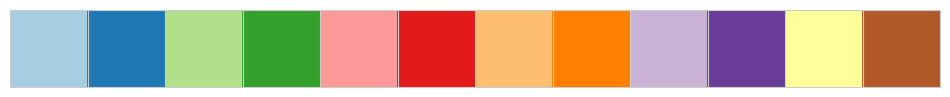

In [ ]:
# 시각화 옵션 함수
def plot_option():
  plt.figure(figsize=(6, 6))
  plt.grid()
  plt.xlabel('when', fontweight='bold')
  plt.ylabel('score', fontweight='bold')
  plt.title('Box Plot', fontweight='bold')
  plt.grid()
  sns.palplot(sns.color_palette("Paired"))

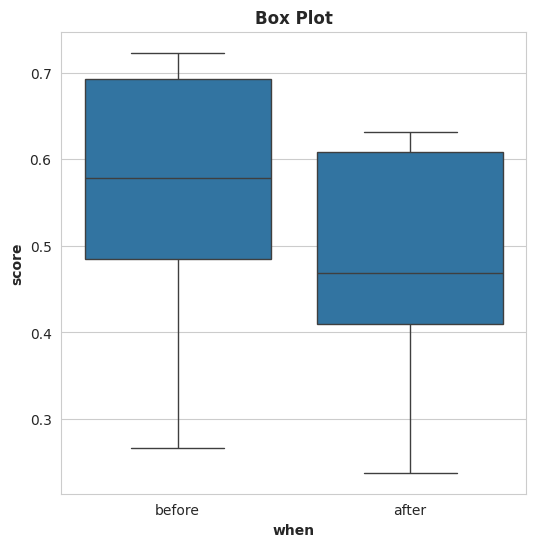

In [ ]:
plot_option()
sns.boxplot(x='when', y='score', data=data)
plt.show()

In [ ]:
# 샤피로(shapiro) 정규성 검정

# 귀무가설: 표본분포가 정규분포를 이루고 있다(즉, 정규분포와 유사함)
# 대립가설: 표본분포가 정규분포를 이루고 있지 않다(즉, 정규분포가 아님)

normal1 = shapiro(x1)
normal2 = shapiro(x2)
print(normal1)
print(normal2)

ShapiroResult(statistic=0.9223616270626398, pvalue=0.3770736561559491)
ShapiroResult(statistic=0.8827135953043233, pvalue=0.1401773901898371)


In [ ]:
 # 레빈(levene) 등분산 검정

 # 귀무가설: 등분산성을 충족한다
 # 대립가설: 등분산성을 충족하지 않는다

levene(x1, x2)

LeveneResult(statistic=0.00031724210860253736, pvalue=0.9859853433842356)

In [ ]:
# T-검정을 실시하기 위해서 정규성/등분산성을 만족해야하여, 두 가지를 고려하고자 한다.

# 본 데이터셋은 30개 이상이 아니므로 중심극한정리를 적용할 수 없으므로 사파로 정규성 검정을 진행했다.
# 이를 통해, pvalue가 0.05보다 커서 귀무가설을 기각할 수 없어, 정규성을 갖는다고 해석할 수 있다.

# 추가적으로 등분산성 또한 검증하기 위해 레빈 등분산 검정을 진행했다.
# 이를 통해, pvalue가 0.05보다 커서 등분산성이 있다고 해석할 수 있다.

In [ ]:
ttest_rel(x1, x2)

TtestResult(statistic=4.863812745135183, pvalue=0.0008911154578225479, df=9)

In [ ]:
# pvalue가 0.05보다 작아서 귀무가설을 기각할 수 있다.
# 따라서, 2개 그룹의 평균 차이는 통계적으로 유의하다는 것을 확인했다.